In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/srikanthgembali/Downloads/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None


In [4]:
#Checking Missing Values
print(df.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [5]:
#Removing redundant columns
df.drop(['User ID'],axis =1 ,inplace =True) 

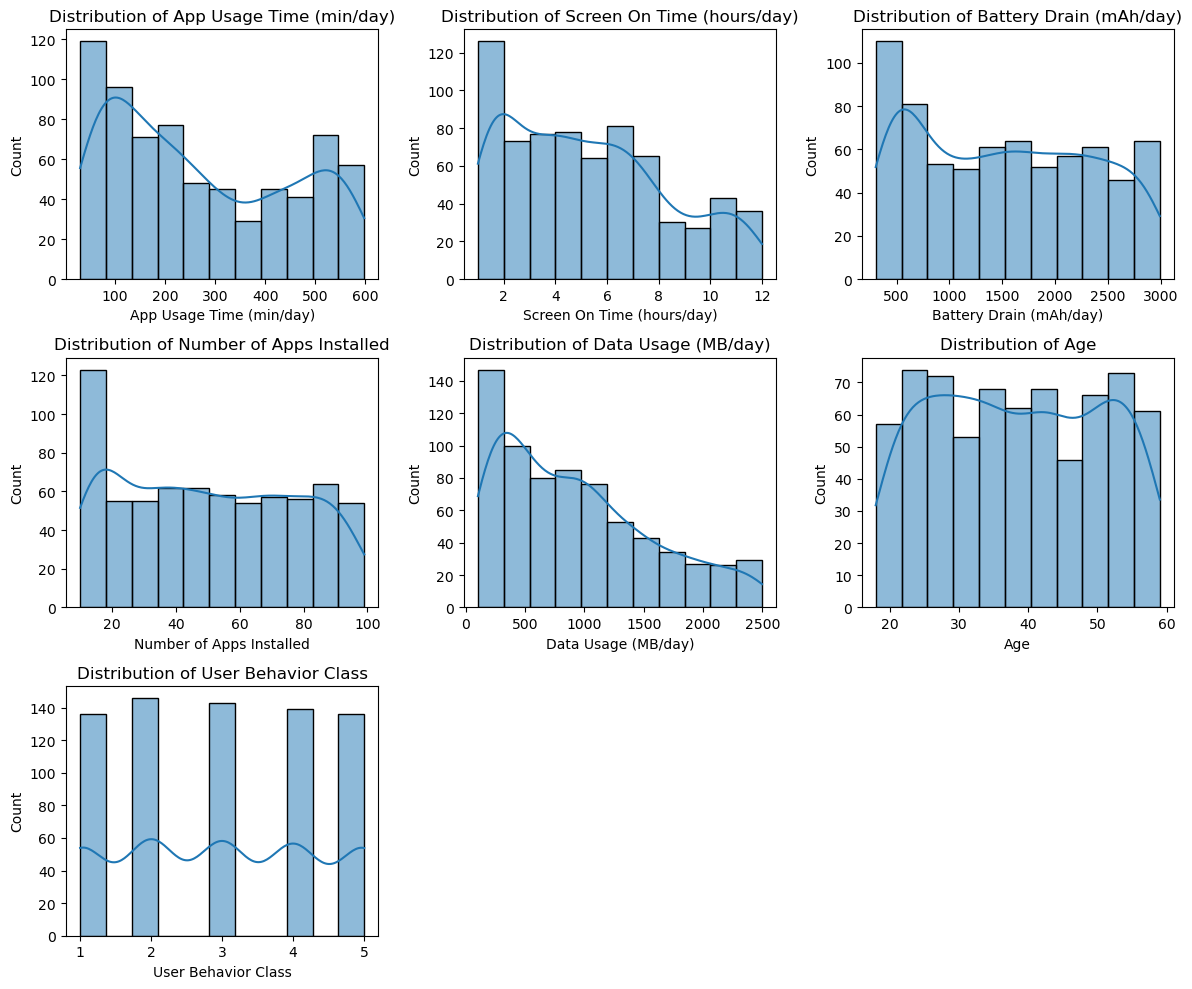

In [13]:
#Distribution of columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

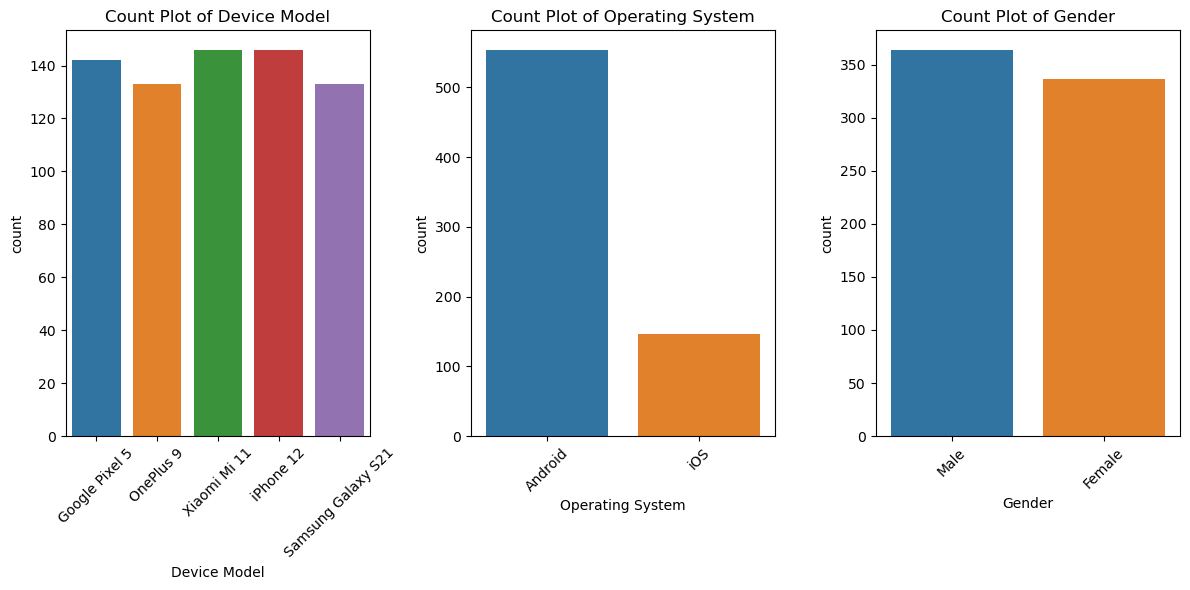

In [16]:
#Count of categorical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

In [21]:
#Transforming categorical columns
from sklearn.preprocessing import LabelEncoder
def transform(df,column):
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
transform(df,'Device Model')
transform(df,'Operating System')
transform(df,'Gender')

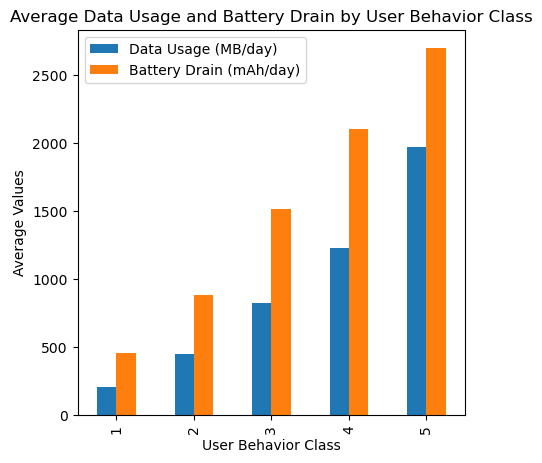

In [23]:
#Other Analysis

avg_data_battery = df.groupby('User Behavior Class')[['Data Usage (MB/day)', 'Battery Drain (mAh/day)']].mean()
avg_data_battery.plot(kind='bar', figsize=(5, 5))
plt.title("Average Data Usage and Battery Drain by User Behavior Class")
plt.ylabel("Average Values")
plt.show()

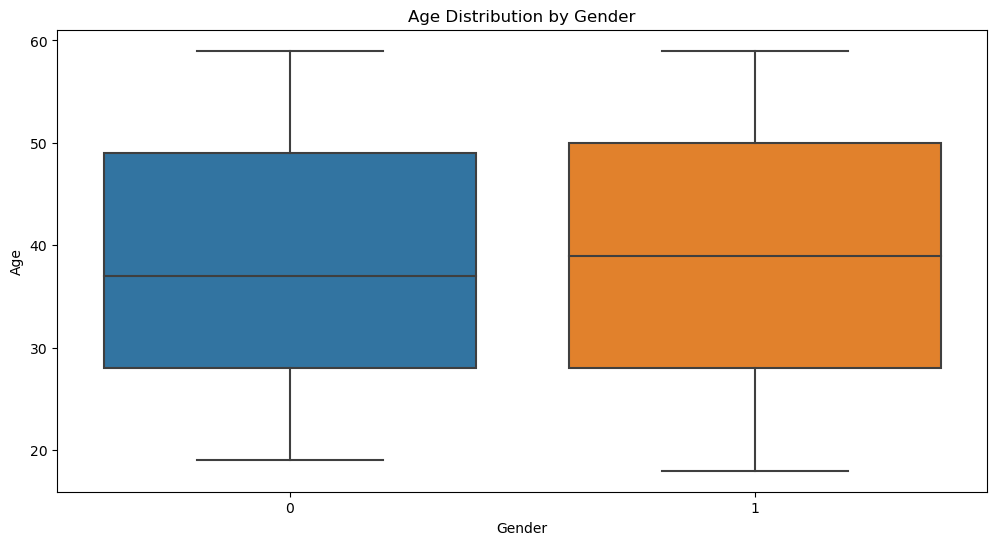

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title("Age Distribution by Gender")
plt.show()